In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [2]:
%cd ..
%cd Coursera/Coursera/CSVs/

C:\Users\AMOS OSHIYOYE\Documents\VSCODE_user_files
C:\Users\AMOS OSHIYOYE\Documents\VSCODE_user_files\Coursera\Coursera\CSVs


In [3]:
df=pd.read_csv('ChicagoPublicSchools.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 78 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   School_ID                                         566 non-null    int64  
 1   NAME_OF_SCHOOL                                    566 non-null    object 
 2   Elementary, Middle, or High School                566 non-null    object 
 3   Street_Address                                    566 non-null    object 
 4   City                                              566 non-null    object 
 5   State                                             566 non-null    object 
 6   ZIP_Code                                          566 non-null    int64  
 7   Phone_Number                                      566 non-null    object 
 8   Link                                              565 non-null    object 
 9   Network_Manager      

In [5]:
df['AVERAGE_STUDENT_ATTENDANCE']=df['AVERAGE_STUDENT_ATTENDANCE'].apply(lambda x: float(str(x).strip('%')))
df['Average_Teacher_Attendance']=df['Average_Teacher_Attendance'].apply(lambda x: float(str(x).strip('%')))

In [6]:
zip_sch_type=df.groupby('ZIP_Code')['Elementary, Middle, or High School'].value_counts(sort=False)
zip_safety=df.groupby('ZIP_Code')['SAFETY_SCORE'].mean()
zip_avg_att=df.groupby('ZIP_Code')['AVERAGE_STUDENT_ATTENDANCE'].mean()
zip_center=df.groupby('ZIP_Code')['Latitude','Longitude'].mean().reset_index()
chicago_midpoint=df.loc[:,['Latitude','Longitude']].mean()
# zip_center

C:\Users\AMOS OSHIYOYE\AppData\Local\Temp\ipykernel_3584\2522552395.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  zip_center=df.groupby('ZIP_Code')['Latitude','Longitude'].mean().reset_index()


In [7]:
import folium
from folium import DivIcon,plugins

In [8]:
df["Adequate_Yearly_Progress_Made_"].value_counts()

No     476
Yes     72
NDA     18
Name: Adequate_Yearly_Progress_Made_, dtype: int64

In [9]:
# lap=df.groupby(['ZIP_Code'])['Latitude','Longitude'].transform('median')
# lap.rename(columns={'Latitude':'Latitude_','Longitude':'Longitude_'}
# df['Latitude_']=lap.iloc[:,0]
df[['Latitude_','Longitude_']]=df.groupby(['ZIP_Code'])['Latitude','Longitude'].transform('median')

C:\Users\AMOS OSHIYOYE\AppData\Local\Temp\ipykernel_3584\1374897365.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[['Latitude_','Longitude_']]=df.groupby(['ZIP_Code'])['Latitude','Longitude'].transform('median')


%cd ..
%cd ..
%cd ..
%cd "Chicago Schools"

In [10]:
sch_map=folium.Map(location=chicago_midpoint,zoom_start=10,tiles='OpenStreetMap')
clusters=plugins.MarkerCluster().add_to(sch_map)
for i, rows in df.iterrows():
    lat=df.at[i,'Latitude_']
    long=df.at[i,'Longitude_']
    folium.Circle(location=[lat,long],radius=200,color='purple',).add_to(sch_map)
for i,row in df.iterrows():
    lat=df.at[i,'Latitude']
    long=df.at[i,'Longitude']
    name=df.at[i,'NAME_OF_SCHOOL']
    type_=df.at[i,'Elementary, Middle, or High School']
    web=df.at[i,'Link']
   
# str.find(df.at[i,'NAME_OF_SCHOOL'],'Lang')
    if type_=='ES':
        type_='Elementary Schools'
        color_='darkblue'
    elif type_=='MS':
        color_='darkred'
        type_='Middle School'
    elif type=='HS':
        type_='High School'
        color_='darkgreen'
    else:
        type_='Others'
    def sch_special():
        if str.find(df.at[i,'NAME_OF_SCHOOL'],'Lang')!=-1:
            icon_='globe'
        else:
            icon_='book'
        return icon_
            
    pop_up= "<div style='background-color:grey;color:white;'>"+name+'<br> School Type: '+type_ + '<br> ' + str(web) + '<br></div>'
    folium.Marker(location=[lat,long],tooltip=name,popup=pop_up,icon=folium.Icon(icon=sch_special(),icon_color=color_,prefix='glyphicon',icon_size=(2,2),icon_anchor=(0,0))).add_to(clusters)
    # 
folium.Circle(location=chicago_midpoint, radius=400,tooltip="Proposed Site for the Chicago Central Library", color='black',fill=True,fill_color='lightblue').add_to(sch_map)
# folium.Marker(location=chicago_midpoint,,icon=folium.Icon(icon_size=(5,5))).add_to(sch_map)
sch_map.save('index.html')
sch_map

In [11]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [12]:
for a,b in df.iterrows():
    lat_z=df.at[a,'Latitude_']
    long_z=df.at[a,'Longitude_']
    lat=df.at[a,'Latitude']
    long=df.at[a,'Longitude']
    distance_=calculate_distance(lat,long,lat_z,long_z)
    folium.Marker([lat,long],
    icon=DivIcon(
    icon_size=(20,20),
    icon_anchor=(0,0),
    html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_),
    )
    ).add_to(sch_map)
    folium.Polygon([[lat_z,long_z],[lat,long]]).add_to(sch_map)

sch_map.save('index.html')
# df['Latitude_']

In [13]:
#Dropping all columns  with value NDA greater than 100
columns_to_drop = df.columns[df.apply(lambda x: x.value_counts().get("NDA", 0) > 100)].tolist()
df.drop(columns=columns_to_drop,inplace=True)

In [14]:
df.head()

,School_ID,NAME_OF_SCHOOL,"Elementary, Middle, or High School",Street_Address,City,State,ZIP_Code,Phone_Number,Link,Network_Manager,...,Y_COORDINATE,Latitude,Longitude,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,Ward,Police_District,Location,Latitude_,Longitude_
0,610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,...,1915829.428,41.924497,-87.644522,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)",41.923177,-87.646015
1,610281,Adam Clayton Powell Paideia Community Academy ...,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressRep...,Skyway Elementary Network,...,1856209.466,41.760324,-87.556736,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)",41.760593,-87.574441
2,610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressRep...,Midway Elementary Network,...,1851012.215,41.747111,-87.731702,70,ASHBURN,13,8,"(41.74711093, -87.73170248)",41.743988,-87.713516
3,609993,Agustin Lara Elementary Academy,ES,4619 S Wolcott Ave,Chicago,IL,60609,(773) 535-4389,http://schoolreports.cps.edu/SchoolProgressRep...,Pershing Elementary Network,...,1873959.199,41.809757,-87.672145,61,NEW CITY,20,9,"(41.8097569, -87.6721446)",41.807263,-87.659969
4,610513,Air Force Academy High School,HS,3630 S Wells St,Chicago,IL,60609,(773) 535-1590,http://schoolreports.cps.edu/SchoolProgressRep...,Southwest Side High School Network,...,1880745.126,41.828146,-87.632794,34,ARMOUR SQUARE,11,9,"(41.82814609, -87.63279369)",41.807263,-87.659969


In [15]:
df.groupby(['Environment_Icon'])[['Environment_Score']].agg(['max','min','mean','std'])

Environment_Score                           
                               max   min       mean       std
Environment_Icon                                             
Average                       59.0  40.0  48.660944  5.522764
NDA                            NaN   NaN        NaN       NaN
Strong                        79.0  60.0  66.656250  5.113096
Very Strong                   99.0  80.0  89.105263  7.673148
Very Weak                     19.0   1.0  12.533333  5.501515
Weak                          39.0  20.0  32.573333  4.797016

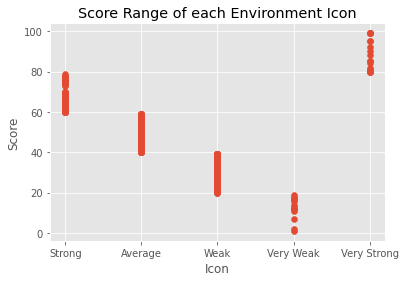

In [16]:
plt.scatter(df['Environment_Icon'],df['Environment_Score'])
plt.xlabel('Icon')
plt.ylabel('Score')
plt.title('Score Range of each Environment Icon')
plt.show()

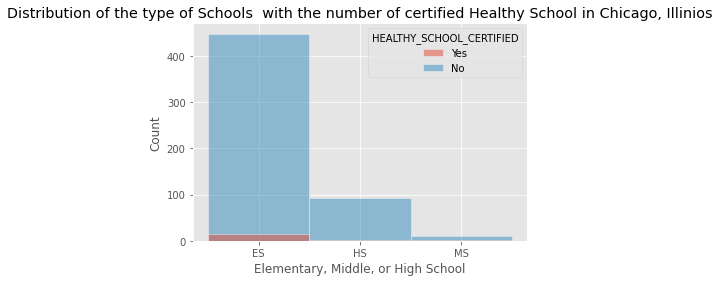

In [17]:
ax=sns.histplot(data=df,x='Elementary, Middle, or High School',hue='HEALTHY_SCHOOL_CERTIFIED')
ax.set_title('Distribution of the type of Schools  with the number of certified Healthy School in Chicago, Illinios')
# ax.set_xticks(['Elementary School','High School', 'Middle School'])
plt.show()

In [18]:
df.columns

Index(['School_ID', 'NAME_OF_SCHOOL', 'Elementary, Middle, or High School',
       'Street_Address', 'City', 'State', 'ZIP_Code', 'Phone_Number', 'Link',
       'Network_Manager', 'Collaborative_Name',
       'Adequate_Yearly_Progress_Made_', 'Track_Schedule',
       'CPS_Performance_Policy_Status', 'CPS_Performance_Policy_Level',
       'HEALTHY_SCHOOL_CERTIFIED', 'Safety_Icon', 'SAFETY_SCORE',
       'Environment_Icon', 'Environment_Score', 'Instruction_Icon',
       'Instruction_Score', 'Leaders_Icon', 'AVERAGE_STUDENT_ATTENDANCE',
       'Rate_of_Misconducts__per_100_students_', 'Average_Teacher_Attendance',
       'Individualized_Education_Program_Compliance_Rate',
       'ISAT_Exceeding_Math__', 'ISAT_Exceeding_Reading__',
       'ISAT_Value_Add_Math', 'ISAT_Value_Add_Read',
       'ISAT_Value_Add_Color_Math', 'ISAT_Value_Add_Color_Read',
       'COLLEGE_ENROLLMENT', 'General_Services_Route', 'X_COORDINATE',
       'Y_COORDINATE', 'Latitude', 'Longitude', 'COMMUNITY_AREA_NUMBER',

In [19]:
attendance_avg=df.groupby('Elementary, Middle, or High School')[['AVERAGE_STUDENT_ATTENDANCE','Average_Teacher_Attendance']].mean()
attendance_avg

,AVERAGE_STUDENT_ATTENDANCE,Average_Teacher_Attendance
"Elementary, Middle, or High School",,
ES,94.022777,94.944372
HS,83.563441,91.376344
MS,94.672727,95.990909


In [22]:
df.filter(like='Math')[df.filter(like='Math')['ISAT_Value_Add_Color_Math']=='Yellow']
# pd.qcut(df['ISAT_Exceeding_Math__'],q=5).value_counts()
Math_Exam_Score=df.select_dtypes(include=['int','float']).filter(like='Math').join(df.select_dtypes(include=['int','float']).filter(like='Read'))
Exceeding_Scores=df[['ZIP_Code','NAME_OF_SCHOOL','ISAT_Exceeding_Math__','ISAT_Exceeding_Reading__',	'COLLEGE_ENROLLMENT']]


In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scale=StandardScaler()

In [23]:
df.columns

Index(['School_ID', 'NAME_OF_SCHOOL', 'Elementary, Middle, or High School',
       'Street_Address', 'City', 'State', 'ZIP_Code', 'Phone_Number', 'Link',
       'Network_Manager', 'Collaborative_Name',
       'Adequate_Yearly_Progress_Made_', 'Track_Schedule',
       'CPS_Performance_Policy_Status', 'CPS_Performance_Policy_Level',
       'HEALTHY_SCHOOL_CERTIFIED', 'Safety_Icon', 'SAFETY_SCORE',
       'Environment_Icon', 'Environment_Score', 'Instruction_Icon',
       'Instruction_Score', 'Leaders_Icon', 'AVERAGE_STUDENT_ATTENDANCE',
       'Rate_of_Misconducts__per_100_students_', 'Average_Teacher_Attendance',
       'Individualized_Education_Program_Compliance_Rate',
       'ISAT_Exceeding_Math__', 'ISAT_Exceeding_Reading__',
       'ISAT_Value_Add_Math', 'ISAT_Value_Add_Read',
       'ISAT_Value_Add_Color_Math', 'ISAT_Value_Add_Color_Read',
       'COLLEGE_ENROLLMENT', 'General_Services_Route', 'X_COORDINATE',
       'Y_COORDINATE', 'Latitude', 'Longitude', 'COMMUNITY_AREA_NUMBER',

<AxesSubplot:xlabel='SAFETY_SCORE', ylabel='Rate_of_Misconducts__per_100_students_'>

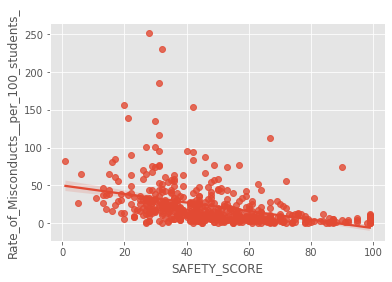

In [39]:
# df[''].value_counts()
sns.regplot(x='SAFETY_SCORE',y='Rate_of_Misconducts__per_100_students_',data=df)

In [43]:
pred_df=[['NAME_OF_SCHOOL','Elementary, Middle, or High School','ISAT_Value_Add_Read','ISAT_Value_Add_Color_Math','COLLEGE_ENROLLMENT', 'Safety_Icon','Adequate_Yearly_Progress_Made_','Rate_of_Misconducts__per_100_students_','Latitude','Longitude']]

In [44]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=20,n_init=10)

In [46]:
pd.get_dummies(pred_df)

TypeError: unhashable type: 'list'